参考：

统计学习方法，李航博士

https://cuijiahua.com/blog/2017/11/ml_8_svm_1.html
# 什么是支持向量机SVM？
支持向量机SVM的英文全称是Support Vector Machines，是用于分类的一种算法。![jupyter](./img/SVM1-1.png)

如图是平面上分类小球的问题。如果是线性可分的，即用一根棍就可以将两种小球分开的时候，我们只要将棍的位置放在让小球距离棍的距离最大化的位置即可，寻找这个**最大间隔**的过程，就叫做**最优化**。但是，现实往往是很残酷的，一般的数据是线性不可分的，也就是找不到一个棍将两种小球很好的分类（如下图）。这个时候，我们就需要像大侠一样，将小球拍起，用一张纸代替小棍将小球进行分类。想要让数据飞起，我们需要的东西就是核函数(kernel)，用于切分小球的纸，就是超平面。![jupyter](./img/SVM1-2.png)

根据上面的描述，问题**从线性可分（上图）延伸到线性不可分（下图）**。下面进行支持向量机的原理性剖析。本部分介绍线性可分，下一部分介绍线性不可分。


# 线性SVM
先看下线性可分的二分类问题。![jupyter](./img/SVM1-3.jpg)上图中的(a)是已有的数据，红色和蓝色分别代表两个不同的类别。数据显然是线性可分的，但是将两类数据点分开的直线显然不止一条。上图的(b)和(c)分别给出了B、C两种不同的分类方案，其中黑色实线为分界线，术语称为“**决策面**”。每个决策面对应了一个线性分类器。虽然从分类结果上看，分类器A和分类器B的效果是相同的。但是他们的性能是有差距的，看下图：![jupyter](./img/SVM1-4.jpg)在"决策面"不变的情况下，我又**添加了一个红点**。可以看到，分类器B依然能很好的分类结果，而分类器C则出现了分类错误。显然分类器B的"决策面"放置的位置优于分类器C的"决策面"放置的位置，SVM算法也是这么认为的，它的依据就是分类器B的分类间隔比分类器C的分类间隔大。这里涉及到第一个SVM独有的概念**"分类间隔"**。

在保证决策面方向不变且不会出现错分样本的情况下移动决策面，会在原来的决策面两侧找到两个极限位置（越过该位置就会产生错分现象），如虚线所示。**虚线的位置由决策面的方向和距离原决策面最近的几个样本的位置决定**。而这两条平行虚线**正中间**的分界线就是在保持当前决策面方向不变的前提下的最优决策面。两条虚线之间的垂直距离就是这个最优决策面对应的**分类间隔**。显然每一个可能把数据集正确分开的方向都有一个最优决策面（有些方向无论如何移动决策面的位置也不可能将两类样本完全分开），而不同方向的最优决策面的分类间隔通常是不同的，那个具有**“最大间隔”**的决策面就是SVM要寻找的最优解。而这个真正的最优解对应的两侧虚线所穿过的样本点，就是SVM中的支持样本点，称为**"支持向量"**。

**（1）线性可分支持向量机**

给定线性可分数据集，通过间隔最大化或等价地求解凸二次规划问题学习得到得分离超平面为$$w^*\cdot x+b^*=0$$
以及相应得分类函数$$f(x)=sign(w^*\cdot x +b^*)$$称为线性可分支持向量机。

**（2）函数间隔**

对于给定的训练数据集T和超平面$(w,b)$，定义超平面$(w,b)$关于**样本点$(x_i,y_i)$**的函数间隔为$$\hat \gamma_i=y_i(w\cdot x_i+b)$$
定义超平面$(w,b)$关于**训练数据集T**的函数间隔为超平面$(w,b)$关于T中所有样本点$(x_i,y_i)$的函数间隔之最小值，即$$\hat \gamma=min\hat \gamma_i$$函数间隔可以表示分类预测的正确性及确信程度。

如果超平面不变，但是成比例改变w和b，例如改为2w和2b，则函数间隔时原来的2倍。这提示我们，需要对法向量加以约束，使得间隔是确定的。这时，函数间隔就变成了**几何间隔**。

**（3）几何间隔**

对于给定的训练数据集T和超平面$(w,b)$，定义超平面$(w,b)$关于**样本点$(x_i,y_i)$**的几何间隔为$$\gamma_i=y_i\frac{w\cdot x_i+b}{\parallel w \parallel}$$
定义超平面$(w,b)$关于**训练数据集T**的几何间隔为超平面$(w,b)$关于T中所有样本点$(x_i,y_i)$的几何间隔之最小值，即$$\gamma=min \gamma_i$$函数间隔可以表示分类预测的正确性及确信程度。

## 数学建模
求解这个"决策面"的过程，就是最优化。一个最优化问题通常有两个基本的因素：

1）目标函数，也就是你希望什么东西的什么指标达到最好；

2）优化对象，你期望通过改变哪些因素来使你的目标函数达到最优。

在线性SVM算法中，目标函数显然就是那个"分类间隔"，而优化对象则是决策面。所以要对SVM问题进行数学建模，首先要对上述两个对象（"分类间隔"和"决策面"）进行数学描述。按照一般的思维习惯，我们先描述决策面。

数学建模的时候，先在二维空间建模，然后再推广到多维。

### "决策面"方程
我们都知道二维空间下一条直线的方式如下所示：$$y=ax+b$$做个小小的改变，让原来的x轴变成$x_1$，y轴变成$x_2$，移项后$ax_1-x_2+b=0$，向量化$$ \left [\matrix{a & -1} \right]\left [\matrix{x_1\cr x_2} \right]+b=0$$进一步向量化$w^Tx+b=0$，向量化后直线的w和b的几何意义是什么呢？![jupyter](./img/SVM1-5.png)

蓝色的线代表向量w，红色的线代表直线y。我们可以看到向量w和直线的关系为**垂直关系**。这说明了向量w也控制这直线的方向，只不过是与这个直线的方向是垂直的。标量b的作用也没有变，依然决定了直线的截距。此时，我们称**w为直线的法向量**。

二维空间的直线方程已经推导完成，将其推广到n维空间，就变成了超平面方程。(一个超平面，在二维空间的例子就是一个直线)但是它的公式没变，此时$$w=[w_1,w_2,\dots,w_n]^T，x=[x_1,x_2,\dots,x_n]^T$$
###  "分类间隔"方程

现在，我们依然对于一个二维平面的简单例子进行推导。![jupyter](./img/SVM1-6.png)

间隔的大小实际上就是支持向量对应的样本点到决策面的距离的二倍。**点到直线的距离距离公式**如下：$$d=|\frac{Ax_0+By_0+C}{\sqrt{A^2+B^2}}|$$公式中的直线方程为$Ax+By+C=0$，点P的坐标为$(x_0,y_0)$。

现在，将直线方程扩展到多维，求得我们现在的超平面方程，对公式进行如下变形：$$d=\frac{|w^Tx+b|}{||w||}$$这个d就是"分类间隔"。其中**||w||表示w的二范数**，求所有元素的平方和，然后再开方。

我们目的是为了找出一个分类效果好的超平面作为分类器。**分类器的好坏的评定依据是分类间隔W=2d的大小，即分类间隔w越大，我们认为这个超平面的分类效果越好**。此时，求解超平面的问题就变成了求解分类间隔W最大化的为题。W的最大化也就是d最大化的。

### 约束条件
我们已经顺利获得了目标函数的数学形式，但是为了求解w的最大值。我们不得不面对如下问题：

1）如何判断超平面是否将样本点正确分类？

2)知道要求距离d的最大值，首先需要找到支持向量上的点，怎么在众多的点中选出支持向量上的点呢？

上述需要面对的问题就是**约束条件**，也就是说优化的变量d的取值范围受到了限制和约束。事实上约束条件一直是最优化问题里最让人头疼的东西。但既然已经知道了这些约束条件确实存在，就不得不用数学语言对他们进行描述。但SVM算法通过一些巧妙的小技巧，将这些约束条件融合到一个不等式里面。

这个**二维平面上有两种点**，分别对它们进行标记：红颜色的圆点标记为+1，规定其为**正样本**；蓝颜色的五角星标记为-1，规定其为**负样本**。

对每个样本点$x_i$加上一个类别标签$y_i$：
$$ y_i=\left\{ \begin{align} 
+1 \mbox{红色点}\\
-1 \mbox{蓝色点}
\end{align} \right.$$
如果我们的超平面方程能够完全正确地对上图的样本点进行分类，就会满足下面的方程：
$$\left\{ \begin{align} 
&w^Tx_i+b>0,y_i=1 \\
&w^Tx_i+b<0,y_i=-1
\end{align} \right.
$$如果我们要求再高一点，假设决策面正好处于间隔区域的中轴线上，并且相应的支持向量对应的样本点到决策面的距离为d，那么公式进一步写成：$$\left\{ \begin{align}
&\frac{w^Tx_i+b}{\lVert w\rVert}\geqslant d,\forall y_i=1 \\
&\frac{w^Tx_i+b}{\lVert w\rVert}\leqslant -d,\forall y_i=-1
\end{align} \right.
$$上述公式的解释就是，对于所有分类标签为1和-1样本点，它们到直线的距离都大于等于d(支持向量上的样本点到超平面的距离)。公式两边都除以d，就可以得到：
$$\left\{ \begin{align}
&w_d^Tx_i+\gamma_d \geqslant 1,\forall y_i=1 \\
&w_d^Tx_i+\gamma_d \leqslant -1,\forall y_i=-1
\end{align} \right.
$$

$$w_d=\frac{w}{\lVert w\rVert d},\gamma_d=\frac{\gamma }{\lVert w\rVert d}$$

所以上述公式的两个矢量$w_d$和$γ_d$，依然描述一条直线的法向量和截距。**将上述方程变成如下形式**：$$y_i(w^Tx_i+\gamma)\geqslant 1,\forall x_i$$
这里的技巧将标签置为1和-1（而不是1和0），方便我们将约束条件变成一个约束方程，从而便于后续计算。

删除
$$\begin{align}
    &x +  y = 1\\
    &2x + y \neq 1\\
    &3x +4y \leq 2\\
    &4x \geq y
\end{align}$$

$$ \begin{eqnarray*}
\cos 2 \theta & = & \cos^2 \theta - \sin^2 \theta\\
&=& 2\cos^2 \theta - 1 \end{eqnarray*}$$

### 线性SVM优化问题基本描述

上面得到了目标函数：$$d=\frac{|w^Tx+\gamma|}{\lVert w \rVert}$$优化目标是d最大化。

我们用支持向量上的样本点求解d的最大化的问题的。那么支持向量上的样本点有什么特点呢？$$|w^Tx_i+\gamma|=1,\forall支持向量上的样本点x_i$$将我们的目标函数进一步化简：$$d=\frac{1}{\lVert w \rVert}$$因为，我们只关心支持向量上的点。随后我们求解d的最大化问题变成了||w||的最小化问题。进而||w||的最小化问题等效于
$$\left\{\begin{align}
&min\frac{1}{2}{\lVert w \rVert}^2\tag 1\\
&s.t. \\
&y_i(w^Tx_i+b)\geqslant1,i=1,2,\dots,n \tag 2
\end{align}\right.$$
这个等式变化是为了最优化的过程中对目标函数求导时比较方便，但这绝对不影响最优化问题最后的求解。

这里n是样本点的总个数，缩写s.t.表示"Subject to"，是"服从某某条件"的意思。上述公式描述的是一个典型的不等式约束条件下的二次型函数优化问题，同时也是支持向量机的基本数学模型。


### 求解准备

得到支持向量机的基本数学模型，接下来的问题就是求解模型的最优解。在学习求解方法之前，先了解求解方法的前提，就是我们的目标函数必须是**凸函数**。理解凸函数，我们还要先明确另一个概念，**凸集**。在凸几何中，凸集(convex set)是在凸组合下闭合的放射空间的子集。看一幅图可能更容易理解：![jupyter](./img/SVM1-7.png)左右量图都是一个集合。如果集合中任意2个元素连线上的点也在集合中，那么这个集合就是凸集。显然，上图中的左图是一个凸集，上图中的右图是一个非凸集。

**凸函数**的定义也是如此，其几何意义表示为函数任意两点连线上的值大于对应自变量处的函数值。若这里凸集C即某个区间L，那么，设函数f为定义在区间L上的函数，若对L上的任意两点x1，x2和任意的实数λ，λ属于(0,1)，总有：$$f(\lambda x_1+(1-\lambda)x_2)<=\lambda f(x_1)+(1-\lambda)f(x_2)$$对于我们的目标函数：$$d=\frac{1}{\lVert w \rVert}$$很显然，它是一个凸函数。所以，可以使用下面的方法求取最优解。

通常我们需要求解的最优化问题有如下几类(a、b、c)：

a）无约束优化问题：$$minf(x)$$
b）有等式的优化问题：
$$\left\{ \begin{align}
&minf(x) \\
&s.t.\\
&h_{i(x)}=0,i=1,2,\cdots,n
\end{align} \right.
$$
c）有不等式约束的优化问题:
$$\left\{ \begin{align} 
&minf(x) \\
&s.t.\\
&g_{i(x)}\le 0,i=1,2,\cdots,n\\
&h_{i(x)}=0,i=1,2,\cdots,n
\end{align} \right.
$$

对于第(a)类的优化问题，尝试使用的方法就是**费马大定理(Fermat)**，即使用求取函数f(x)的导数，然后令其为零，可以求得候选最优值，再在这些候选值中验证；如果是凸函数，可以保证是最优解。这也就是我们高中经常使用的求函数的极值的方法。

对于第(b)类的优化问题，常常使用的方法就是**拉格朗日乘子法（Lagrange Multiplier)**，即把等式约束$h_i(x)$用一个系数与f(x)写为一个式子，称为**拉格朗日函数**，而系数称为**拉格朗日乘子**。通过拉格朗日函数对各个变量求导，令其为零，可以求得候选值集合，然后验证求得最优值。

对于第(c)类的优化问题，常常使用的方法就是**KKT条件**。同样地，我们把所有的等式、不等式约束与f(x)写为一个式子，也叫拉格朗日函数，系数也称拉格朗日乘子，通过一些条件，可以求出最优值的必要条件，这个条件称为KKT条件。

必要条件和充要条件如果不理解，可以看下面这句话：A的必要条件就是A可以推出的结论，A的充分条件就是可以推出A的前提。

了解到这些，现在再看一下我们的最优化问题：$$\left\{\begin{align}
&min\frac{1}{2}{\lVert w \rVert}^2\\
&s.t. \\
&y_i(w^Tx_i+b)\geqslant1,i=1,2,\dots,n
\end{align}\right.$$
这个优化问题属于第(c)类问题。在学习求解最优化问题之前，我们还要学习两个东西：**拉格朗日函数和KKT条件**。

### 拉格朗日函数

首先，我们先要从宏观的视野上了解一下**拉格朗日对偶问题**出现的原因和背景。

我们知道我们要求解的是最小化问题，所以一个直观的想法是如果我能够构造一个函数，使得该函数在可行解区域内与原目标函数完全一致，而在可行解区域外的数值非常大，甚至是无穷大，那么这个没有约束条件的新目标函数的优化问题就与原来有约束条件的原始目标函数的优化问题是等价的问题。这就是使用拉格朗日方程的目的，它将约束条件放到目标函数中，从而**将有约束优化问题转换为无约束优化问题**。

随后，人们又发现，使用拉格朗日获得的函数，使用求导的方法求解依然困难。进而，需要对问题再进行一次转换，即使用一个数学技巧：**拉格朗日对偶**。

所以，显而易见的是，我们在拉格朗日优化我们的问题这个道路上，需要进行下面二个步骤：

1）将有约束的原始目标函数转换为无约束的新构造的拉格朗日目标函数

2）使用拉格朗日对偶性，将不易求解的优化问题转化为易求解的优化

下面，进行第一步：**将有约束的原始目标函数转换为无约束的新构造的拉格朗日目标函数**

公式变形如下：$$L(w,b,a)=\frac{1}{2}\parallel w \parallel^2-\sum_{i=1}^na_i(y_i(w^Tx_i+b)-1)$$
其中$a_i\geqslant 0$是拉格朗日乘子，是我们构造新目标函数时引入的系数变量(我们自己设置)。现在令：$$\theta(w)=max_{a_i\geqslant 0}L(w,b,a)$$

当样本点不满足约束条件时，即在可行解区域外：$$y_i(w^Tx_i+b)< 1$$

此时，我们将$a_i$设置为正无穷，此时θ(w)显然也是正无穷。

当样本点满足约束条件时，即在可行解区域内：$$y_i(w^Tx_i+b)\geq 1$$此时，显然θ(w)为原目标函数本身。我们将上述两种情况结合一下，就得到了**新的目标函数**：
$$\theta(w)=\left\{ \begin{align}
&\frac{1}{2}\parallel w \parallel^2 ,x\in 可行区 \\
&+\infty ,x\in 非可行区
\end{align} \right.
$$
此时，再看我们的初衷，就是为了建立一个在可行解区域内与原目标函数相同，在可行解区域外函数值趋近于无穷大的新函数，现在我们做到了。

现在，我们的问题变成了求新目标函数的最小值，即：$$min_{w,b}\theta (w)=min_{w,b}max_{a_i\geqslant 0}L(w,b,a)=p^*
$$

这里用p*表示这个问题的最优值，且和最初的问题是等价的。

接下来，我们进行第二步：**将不易求解的优化问题转化为易求解的优化**

看一下新目标函数，先求最大值，再求最小值。这样的话，我们首先就要面对带有需要求解的参数w和b的方程，而$a_i$是不等式约束，这个求解过程不好做。所以，我们需要使用拉格朗日函数对偶性，将最小和最大的位置交换一下，这样就变成了：$$max_{a_i\geqslant 0}min_{w,b}L(w,b,a)=p^*$$

交换以后的新问题是原始问题的**对偶问题**，这个新问题的最优值用d*来表示。而且d*<=p*。我们关心的是d=p的时候，这才是我们要的解。需要什么条件才能让d=p呢？

1)首先必须满足这个优化问题是凸优化问题。

2)其次，需要满足KKT条件。

凸优化问题的定义是：求取最小值的目标函数为凸函数的一类优化问题。目标函数是凸函数我们已经知道，这个优化问题又是求最小值。所以我们的最优化问题就是凸优化问题。

接下里，就是探讨是否满足KKT条件了。

### KKT条件

我们已经使用拉格朗日函数对我们的目标函数进行了处理，生成了一个新的目标函数。通过一些条件，可以求出最优值的必要条件，这个条件就是接下来要说的KKT条件。一个最优化模型能够表示成下列标准形式：$$\theta(w)=\left\{ \begin{align}
&min f(x) \\
&s.t.\\
&h_j(x)=0,j=1,2,\cdots,p\\
&g_k(x)\leqslant 0,k=1,2,\cdots,q\\
&x\in X\subset R^n
\end{align} \right.
$$

KKT条件的全称是Karush-Kuhn-Tucker条件，**KKT条件是说最优值条件必须满足以下条件**：

条件一：经过拉格朗日函数处理之后的新目标函数$L(w,b,α)$对x求导为零：

条件二：h(x) = 0；

条件三：α*g(x) = 0；

现在，凸优化问题和KKT都满足了，问题转换成了对偶问题。而求解这个对偶学习问题，可以分为三个步骤：首先要让L(w,b,α)关于w和b最小化，然后求对α的极大，最后利用SMO算法求解对偶问题中的拉格朗日乘子。现在，我们继续推导。

### 对偶问题求解
上述已经求得拉格朗日函数$$L(w,b,a)=\frac{1}{2}\parallel w \parallel^2-\sum_{i=1}^na_i(y_i(w^Tx_i+b)-1)$$
根据拉格朗日对偶性，原始问题的对偶问题是极大极小问题：$$max_{a_i\geqslant 0}min_{w,b}L(w,b,a)$$
所以，为了得到对偶问题的求解，需要先求$L(w,b,a)$对$w,b$的极小问题，再求对$a$的极大问题。

第一步：求$$min_{w,b}L(w,b,a)$$
将拉格朗日函数$L(w,b,a)$分别对$w,b$求偏导，并令其为0。得到
$$w=\sum_i^na_iy_ix_i$$$$\sum_i^na_iy_i=0$$
将结果带入拉格朗日函数$L(w,b,a)$，并利用上面结果，得到
$$\begin{eqnarray*}
L(w,b,a)&=&\frac{1}{2}\parallel w \parallel^2-\sum_{i=1}^na_i(y_i(w^Tx_i+b)-1)\\
&=&\frac{1}{2}\parallel w \parallel^2-\sum_{i=1}^na_i(y_i(w^Tx_i+b))+\sum_{i=1}^na_i)\\
&=&\frac{1}{2}\sum_i^n\sum_j^na_ia_jy_iy_j(x_i\cdot x_j)-\sum_i^na_iy_i((\sum_j^na_jy_jx_j)\cdot x_i+b)+\sum_i^na_i\\
&=&-\frac{1}{2}\sum_i^n\sum_j^na_ia_jy_iy_j(x_i\cdot x_j)+\sum_i^na_i\\
\end{eqnarray*}$$

第二步：求$min_{w,b}L(w,b,a)$对$a$的极大，即是对偶问题
$$\begin{align}
&max_a-\frac{1}{2}\sum_i^n\sum_j^na_ia_jy_iy_j(x_i\cdot x_j)+\sum_i^na_i \tag 4\\
&s.t.\\
&\sum_i^na_iy_i=0 \tag 5\\
&a_i\geqslant 0,i=1,2,\cdots,n \tag 6
\end{align}$$

这意味着，原始优化问题（1）、（2）可以转化为求解对偶问题（4）、（5）、（6）,并且存在解。

对线性可分数据集，假设对偶最有问题（4）、（5）、（6）对$a$的解为$a^*=(a_1^*,a_2^*,\cdots,a_n^*)$，则可由$a^*$求得原始问题的解$(w^*,b^*)$。
$$\begin{align}
&w^*=\sum_i^na_i^*y_ix_i \tag 7\\
&b^*=y_i-\sum_i^na_i^*y_i(x_i\cdot x_j) \tag 8
\end{align}$$

**支持向量定义**，考虑原始优化问题（1）（2），及对偶优化问题（3）（4）（5），将训练数据集中对应于$a^*$的样本点$(x_i,y_j)$的实例$x_i\in R^n$称为**支持向量**。

根据这一定义，支持向量一定在间隔边界上，由KKT条件可知，$$a_i^*(y_i(w^*\cdot x_i+b^*)-1)=0,i=1,2,\cdots,n$$对应于$a_i^*>0$的$x_i$，有$$y_i(w^*\cdot x_i+b^*)-1=0$$或者$$w^*\cdot x_i+b^*=\pm$$即$x_i$一定在间隔边界上。这里的支持向量的定义于前面给出的支持向量的定义是一致的。

**例子：**已知训练集T，正例点是$x_1=(3,3)^T,x_2=(4,3)^T$，负例点是$x_3=(1,1)^T$。试求线性可分支持向量机。

根据所给数据，对偶问题是(公式4)：
$$\begin{align}
&min_a-\frac{1}{2}\sum_i^n\sum_j^na_ia_jy_iy_j(x_i\cdot x_j)-\sum_i^na_i\\
&=\frac{1}{2}(18a_1^2+25a_2^2+2a_3^2+42a_1a_2-12a_1a_3-14a_2a_3)-a_1-a_2-a_3\\
&s.t. \\
&a_1+a_2-a_3=0,a_i\geqslant 0,i=1,2,3\end{align}$$
将$a_3=a_1+a_2$带入目标函数并记为$$s(a_1,a_2)=4a_1^2+6.5a_2^2+10a_1a_2-2a_1-2a_2$$
分别求偏导并令其为0，得极值点$(\frac{3}{2},-1)^T$，但该点不满足约束条件$a_i\geqslant 0$，所以最小点应在边界上达到。

当$a_1=0$,最小值是$s(0,\frac{2}{13})=-\frac{2}{13}$；当$a_2=0$，最小值$s(\frac{1}{4},0)=-\frac{1}{4}$。于是$s(a_1,a_2)$在$a_1=\frac{1}{4},a_2=0$达到最小，此时，$a_3=\frac{1}{4}$。

这样，$a^*=(\frac{1}{4},0,\frac{1}{4})$对应的实例点$x_1,x_3$是支持向量，根据（7）（8）得到$$w_1^*=w_2^*=\frac{1}{2},b^*=-2$$
分离超平面为$$\frac{1}{2}x^{(1)}+\frac{1}{2}x^{(2)}-2=0$$
二分类决策函数为$$f(x)=sign\left(\frac{1}{2}x^{(1)}+\frac{1}{2}x^{(2)}-2\right)$$

这个例子是线性可分的，算法是完美的。但是线性可分是理想情形，样本常有噪声或特异点。此时有更一般的学习算法。

有更高效的优化算法，即**序列最小优化（SMO）算法**。我们通过这个优化算法能得到α，再根据α，我们就可以求解出w和b，进而求得我们最初的目的：找到超平面，即"决策平面"。

总结一句话：我们为啥使出吃奶的劲儿进行推导？因为我们要将最初的原始问题，转换到可以使用SMO算法求解的问题，这是一种最流行的求解方法。

## SMO算法
现在，我们已经得到了可以用SMO算法求解的目标函数，但是对于怎么编程实现SMO算法还是感觉无从下手。那么现在就聊聊如何使用SMO算法进行求解。
### Platt的SMO算法
1996年，John Platt发布了一个称为SMO的强大算法，用于训练SVM。SMO表示序列最小化(Sequential Minimal Optimizaion)。Platt的SMO算法是**将大优化问题分解为多个小优化问题来求解的**。这些小优化问题往往很容易求解，并且对它们进行顺序求解的结果与将它们作为整体来求解的结果完全一致的。在结果完全相同的同时，SMO算法的求解时间短很多。

SMO算法的目标是求出一系列a和b，一旦求出了这些a，就很容易计算出权重向量w并得到分隔超平面。

SMO算法的**工作原理**是：每次循环中选择两个a进行优化处理。一旦找到了一对合适的a，那么就增大其中一个同时减小另一个。这里所谓的"合适"就是指两个a必须**符合以下两个条件**，条件之一就是两个a必须要在间隔边界之外，而且第二个条件则是这两个a还没有进行过区间化处理或者不在边界上。
### SMO算法的解法
先来定义特征到结果的输出函数为：
$$u=w^Tx+b$$
我们的原始是
$$\begin{align}
&min\frac{1}{2}{\lVert w \rVert}^2\\
&s.t. \\
&y_i(w^Tx_i+b)\geqslant1,i=1,2,\dots,n \tag 2
\end{align}$$
求导得到了：
$$w=\sum_i^na_iy_ix_i$$
带入到函数$u$:
$$u=\sum_i^na_iy_ix_i^Tx_i+b$$
拉格朗日对偶后，得到最终的目标函数：
$$\begin{align}
&max_a-\frac{1}{2}\sum_i^n\sum_j^na_ia_jy_iy_j(x_i\cdot x_j)+\sum_i^na_i\\
&s.t.\\
&\sum_i^na_iy_i=0,a_i\geqslant 0,i=1,2,\cdots,n
\end{align}$$
在目标函数前加一个负号，转化为最小问题：
$$\begin{align}
&min_a\frac{1}{2}\sum_i^n\sum_j^na_ia_jy_iy_j(x_i\cdot x_j)-\sum_i^na_i\\
&s.t.\\
&\sum_i^na_iy_i=0\\
&a_i\geqslant 0,i=1,2,\cdots,n
\end{align}$$

对于上述问题，存在一个假设：**数据线性可分**。但是数据几乎都不“干净”，导致线性不可分。**线性不可分意味着某些样本点$(x_i,y_i)$不能满足函数间隔大于等于1的约束条件（公式2）。**为了解决这个问题，可以对每个样本点引进一个松弛变量$\xi_i\geqslant 0$，使得函数间隔加上松弛变量大于等于1。这样，约束条件就变为$$y_i(w\cdot x_i+b)\geqslant 1-\xi_i$$同时，对每个松弛变量$\xi_i$，支付一个代价$C$，目标函数（1）就变成了$$\frac{1}{2}\parallel w \parallel^2+C\sum_{i=1}^n\xi_i\tag 9$$
这里，$C>0$称为惩罚参数，一般由应用问题确定，值大时对误分类的惩罚增大，$C$值小时对误分类的惩罚减小。这个目标函数（9）包含两层含义：使$\frac{1}{2}\parallel w \parallel^2$尽量小即间隔尽量大，同时使得误分类点的个数尽量少，$C$是二者的调和系数。

**有了这样的思路，对线性不可分问题，可以和线性可分一样来考虑。**线性不可分的线性支持向量机的学习问题就是如下的表达：
$$\begin{align}
&\frac{1}{2}\parallel w \parallel^2+C\sum_{i=1}^n\xi_i \tag {10}\\
&s.t.\\
&y_i(w\cdot x_i+b)\geqslant 1-\xi_i \tag{11}\\
&\xi_i\geqslant 0,i=1,2,\cdot,n \tag{12}
\end{align}$$

原始问题（10）-（12）的对偶问题是
$$\begin{align}
&min_a\frac{1}{2}\sum_i^n\sum_j^na_ia_jy_iy_j(x_i\cdot x_j)-\sum_i^na_i\\
&s.t.\\
&\sum_i^na_iy_i=0\\
&C\geqslant a_i\geqslant 0,i=1,2,\cdots,n
\end{align}$$

原始问题（10）-（12）的拉格朗日函数为$$L(w,b,\xi,a,u)=\frac{1}{2}\parallel w \parallel^2+C\sum_i^n\xi_i-\sum_{i=1}^na_i(y_i(wx_i+b)-1+\xi_i)-\sum_i^nu_i\xi_i$$

其中，$a_i\geqslant 0,u_i\geqslant 0$。
对偶问题拉格朗日函数的一个极大极小问题，首先求$L(w,b,\xi,a,u)$对$w,b,\xi$de **极小值**，由
$$\begin{align}
&\nabla_wL(w,b,\xi,a,u)=w-\sum_ia_iy_ix_i=0\\
&\nabla_bL(w,b,\xi,a,u)=-\sum_ia_iy_i=0\\
&\nabla_{\xi_i}L(w,b,\xi,a,u)=C-a_i-u_i=0
\end{align}$$得到
$$\begin{align}
&w=\sum_ia_iy_ix_i=0\tag{13}\\
&\sum_ia_iy_i=0\tag{14}\\
&C-a_i-u_i=0\tag{15}
\end{align}$$将（13）-（15）带入$L(w,b,\xi,a,u)$得到
$$min_{w,b,\xi}L(w,b,\xi,a,u)=-\frac{1}{2}\sum_i^n\sum_j^na_ia_jy_iy_j(x_i\cdot x_j)+\sum_i^na_i$$
再对上式$min_{w,b,\xi}L(w,b,\xi,a,u)$求$a$的极大值，即得到对偶问题：
$$\begin{align}
&min_a-\frac{1}{2}\sum_i^n\sum_j^na_ia_jy_iy_j(x_i\cdot x_j)+\sum_i^na_i\\
&s.t.\\
&\sum_ia_iy_i=0\\
&C-a_i-u_i=0\\
&a_i\geqslant 0\\
&u_i\geqslant 0,i=1,2,\cdots,n
\end{align}$$
消去$u_i$，只留下$a_i$，得到本小节前面提到的对偶问题：
$$\begin{align}
&min_a\frac{1}{2}\sum_i^n\sum_j^na_ia_jy_iy_j(x_i\cdot x_j)-\sum_i^na_i\\
&s.t.\\
&\sum_i^na_iy_i=0\\
&C\geqslant a_i\geqslant 0,i=1,2,\cdots,n
\end{align}$$

**【定理】**设$a^*=(a_1^*,a_2^*,\cdots,a_N^*)$是对偶问题的一个解，若存在$a^*$的一个分量$a_j^*，0<a_j^*<C$，则原始问题的解为
$$w^*=\sum_ia_i^*y_ix_i$$$$b^*=y_i-\sum_iy_ia_i^*(x_i\cdot x_j)$$证明略。

## 编程求解线性SVM
已经梳理完了SMO算法实现步骤，接下来按照这个思路编写代码，进行实战练习。
### 可视化数据集
我们先使用简单的数据集进行测试，先看看数据集：

'\n函数说明:读取数据 \nParameters:\n    fileName - 文件名\nReturns:\n    dataMat - 数据矩阵\n    labelMat - 数据标签\n'

'\n函数说明:数据可视化 \nParameters:\n    dataMat - 数据矩阵\n    labelMat - 数据标签\nReturns:\n    无\n'

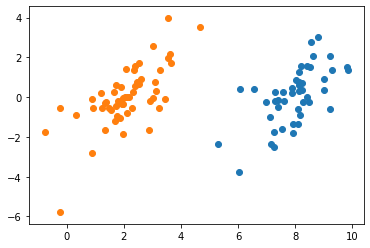

In [3]:
# -*- coding:UTF-8 -*-
import matplotlib.pyplot as plt
import numpy as np

#在下面添加此代码以显示单元格中的所有输出
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity="all"

"""
函数说明:读取数据 
Parameters:
    fileName - 文件名
Returns:
    dataMat - 数据矩阵
    labelMat - 数据标签
"""
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():                                     #逐行读取，滤除空格等
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])      #添加数据
        labelMat.append(float(lineArr[2]))                          #添加标签
    return dataMat,labelMat
 
"""
函数说明:数据可视化 
Parameters:
    dataMat - 数据矩阵
    labelMat - 数据标签
Returns:
    无
"""
def showDataSet(dataMat, labelMat):
    data_plus = []                                  #正样本
    data_minus = []                                 #负样本
    for i in range(len(dataMat)):
        if labelMat[i] > 0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np = np.array(data_plus)              #转换为numpy矩阵
    data_minus_np = np.array(data_minus)            #转换为numpy矩阵
    plt.scatter(np.transpose(data_plus_np)[0], np.transpose(data_plus_np)[1])   #正样本散点图
    plt.scatter(np.transpose(data_minus_np)[0], np.transpose(data_minus_np)[1]) #负样本散点图
    plt.show()
 
if __name__ == '__main__':
    dataMat, labelMat = loadDataSet('./DataSet/SVMtestSet2.txt')
    showDataSet(dataMat, labelMat)

这就是我们使用的二维数据集，显然线性可分。现在我们使用简化版的SMO算法进行求解。
### 简化版SMO算法
按照上述已经推导的步骤编写代码

'\n函数说明:读取数据 \nParameters:\n    fileName - 文件名\nReturns:\n    dataMat - 数据矩阵\n    labelMat - 数据标签\n'

'\n函数说明:随机选择alpha\n \nParameters:\n    i - alpha\n    m - alpha参数个数\nReturns:\n    j -\n'

'\n函数说明:修剪alpha\n \nParameters:\n    aj - alpha值\n    H - alpha上限\n    L - alpha下限\nReturns:\n    aj - alpah值\n'

'\n函数说明:简化版SMO算法\n \nParameters:\n    dataMatIn - 数据矩阵\n    classLabels - 数据标签\n    C - 惩罚参数\n    toler - 松弛变量\n    maxIter - 最大迭代次数\nReturns:\n    无\n'

'\n函数说明:分类结果可视化\n \nParameters:\n    dataMat - 数据矩阵\n    w - 直线法向量\n    b - 直线解决\nReturns:\n    无\n'

'\n函数说明:计算w\n \nParameters:\n    dataMat - 数据矩阵\n    labelMat - 数据标签\n    alphas - alphas值\nReturns:\n    无\n'

L==H
L==H
L==H
L==H
第0次迭代 样本:4, alpha优化次数:1
L==H
L==H
第0次迭代 样本:10, alpha优化次数:2
alpha_j变化太小
第0次迭代 样本:17, alpha优化次数:3
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:25, alpha优化次数:4
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:36, alpha优化次数:5
alpha_j变化太小
第0次迭代 样本:46, alpha优化次数:6
L==H
L==H
第0次迭代 样本:55, alpha优化次数:7
alpha_j变化太小
第0次迭代 样本:60, alpha优化次数:8
L==H
L==H
L==H
L==H
第0次迭代 样本:96, alpha优化次数:9
迭代次数: 0
L==H
alpha_j变化太小
alpha_j变化太小
L==H
第0次迭代 样本:17, alpha优化次数:1
L==H
alpha_j变化太小
L==H
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
alpha_j变化太小
L==H
迭代次数: 0
alpha_j变化太小
L==H
alpha_j变化太小
L==H
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:52, alpha优化次数:1
L==H
alpha_j变化太小
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:30, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:60, alpha优化次数:2
alpha_j变化太小
L==H
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
alpha_j变化太小
L==H
L==H
L==H
L==H
迭代次数: 0
alpha_j变化太小
L==H
L==H
第0次迭代 样本:4, alpha优化次数:1
alpha_j变化太小
L==H
L==H
alpha_j变化太小
L==H
L==H
第0次迭代 样本:39, alpha优化次数:2
alpha_j变化太

迭代次数: 3
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 4
alpha_j变化太小
alpha_j变化太小
第4次迭代 样本:30, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 2
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 3
第3次迭代 样本:8, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 2
第2次迭代 样本:17, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
第2次迭代 样本:55, alpha优化次数:2
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:69, alpha优化次数:1
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小


alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 3
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 4
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 5
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 6
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
第6次迭代 样本:55, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小

alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 5
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 6
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 7
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 8
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 9
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 10
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 11
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 12
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 13
alpha_j变化太小
第13次迭代 样本:54, alpha优化次数:1
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 2
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 3
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 4
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 5
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 6
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 7
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 8
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 9
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 10
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 11
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 12
alpha_j变化太小

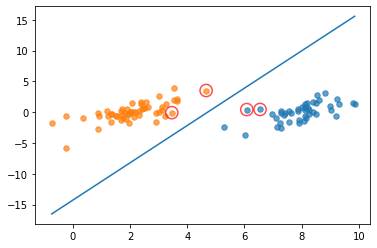

In [4]:
# -*- coding:UTF-8 -*-
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
import random
import types
 
"""
函数说明:读取数据 
Parameters:
    fileName - 文件名
Returns:
    dataMat - 数据矩阵
    labelMat - 数据标签
"""
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():                                     #逐行读取，滤除空格等
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])      #添加数据
        labelMat.append(float(lineArr[2]))                          #添加标签
    return dataMat,labelMat
 
 
"""
函数说明:随机选择alpha
 
Parameters:
    i - alpha
    m - alpha参数个数
Returns:
    j -
"""
def selectJrand(i, m):
    j = i                                 #选择一个不等于i的j
    while (j == i):
        j = int(random.uniform(0, m))
    return j
 
"""
函数说明:修剪alpha
 
Parameters:
    aj - alpha值
    H - alpha上限
    L - alpha下限
Returns:
    aj - alpah值
"""
def clipAlpha(aj,H,L):
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj
 
"""
函数说明:简化版SMO算法
 
Parameters:
    dataMatIn - 数据矩阵
    classLabels - 数据标签
    C - 惩罚参数
    toler - 松弛变量
    maxIter - 最大迭代次数
Returns:
    无
"""
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    #转换为numpy的mat存储
    dataMatrix = np.mat(dataMatIn); labelMat = np.mat(classLabels).transpose()
    #初始化b参数，统计dataMatrix的维度
    b = 0; m,n = np.shape(dataMatrix)
    #初始化alpha参数，设为0
    alphas = np.mat(np.zeros((m,1)))
    #初始化迭代次数
    iter_num = 0
    #最多迭代matIter次
    while (iter_num < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            #步骤1：计算误差Ei
            fXi = float(np.multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            Ei = fXi - float(labelMat[i])
            #优化alpha，更设定一定的容错率。
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                #随机选择另一个与alpha_i成对优化的alpha_j
                j = selectJrand(i,m)
                #步骤1：计算误差Ej
                fXj = float(np.multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                Ej = fXj - float(labelMat[j])
                #保存更新前的aplpha值，使用深拷贝
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();
                #步骤2：计算上下界L和H
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: print("L==H"); continue
                #步骤3：计算eta
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: print("eta>=0"); continue
                #步骤4：更新alpha_j
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                #步骤5：修剪alpha_j
                alphas[j] = clipAlpha(alphas[j],H,L)
                if (abs(alphas[j] - alphaJold) < 0.00001): print("alpha_j变化太小"); continue
                #步骤6：更新alpha_i
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])
                #步骤7：更新b_1和b_2
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                #步骤8：根据b_1和b_2更新b
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                #统计优化次数
                alphaPairsChanged += 1
                #打印统计信息
                print("第%d次迭代 样本:%d, alpha优化次数:%d" % (iter_num,i,alphaPairsChanged))
        #更新迭代次数
        if (alphaPairsChanged == 0): iter_num += 1
        else: iter_num = 0
        print("迭代次数: %d" % iter_num)
    return b,alphas
 
"""
函数说明:分类结果可视化
 
Parameters:
    dataMat - 数据矩阵
    w - 直线法向量
    b - 直线解决
Returns:
    无
"""
def showClassifer(dataMat, w, b):
    #绘制样本点
    data_plus = []                                  #正样本
    data_minus = []                                 #负样本
    for i in range(len(dataMat)):
        if labelMat[i] > 0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np = np.array(data_plus)              #转换为numpy矩阵
    data_minus_np = np.array(data_minus)            #转换为numpy矩阵
    plt.scatter(np.transpose(data_plus_np)[0], np.transpose(data_plus_np)[1], s=30, alpha=0.7)   #正样本散点图
    plt.scatter(np.transpose(data_minus_np)[0], np.transpose(data_minus_np)[1], s=30, alpha=0.7) #负样本散点图
    #绘制直线
    x1 = max(dataMat)[0]
    x2 = min(dataMat)[0]
    a1, a2 = w
    b = float(b)
    a1 = float(a1[0])
    a2 = float(a2[0])
    y1, y2 = (-b- a1*x1)/a2, (-b - a1*x2)/a2
    plt.plot([x1, x2], [y1, y2])
    #找出支持向量点
    for i, alpha in enumerate(alphas):
        if alpha > 0:
            x, y = dataMat[i]
            plt.scatter([x], [y], s=150, c='none', alpha=0.7, linewidth=1.5, edgecolor='red')
    plt.show()
 
 
"""
函数说明:计算w
 
Parameters:
    dataMat - 数据矩阵
    labelMat - 数据标签
    alphas - alphas值
Returns:
    无
"""
def get_w(dataMat, labelMat, alphas):
    alphas, dataMat, labelMat = np.array(alphas), np.array(dataMat), np.array(labelMat)
    w = np.dot((np.tile(labelMat.reshape(1, -1).T, (1, 2)) * dataMat).T, alphas)
    return w.tolist()
 
 
if __name__ == '__main__':
    dataMat, labelMat = loadDataSet('./DataSet/SVMtestSet2.txt')
    b,alphas = smoSimple(dataMat, labelMat, 0.6, 0.001, 40)
    w = get_w(dataMat, labelMat, alphas)
    showClassifer(dataMat, w, b)

其中，中间的蓝线为求出来的分类器，用红圈圈出的点为支持向量点。
# 总结
本文主要进行了线性SVM的推导，并通过编程实现一个简化版SMO算法；
本文的简化版SMO算法在选取α的时候，没有选择启发式的选择方法，并且两个乘子的计算没有进行优化，所以算法比较耗时，下一篇文章会讲解相应的优化方法；
本文讨论的是线性SVM，没有使用核函数，下一篇文章将会讲解如何应用核函数，将SVM应用于非线性数据集；
如有问题，请留言。如有错误，还望指正，谢谢！